In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm

In [2]:
segments_dir = "../../../../../data/SPL/df_segments_updated.pkl"
output_path = "/home/imonge/Documents/sound_amplitude/seasonality"
df = pd.read_pickle(segments_dir)
date_start = pd.to_datetime('2021-07-01')
date_end = pd.to_datetime('2024-10-05')


In [4]:
# Label Catalogue
# Rename labels
labels_info = {
    # Whales
    'BW_dcall': 'Blue Whale D-call',
    'ABW': 'Antarctic blue whale',
    'PBW_SEIO': 'Australian pygmy blue whale',
    'PBW_SWIO': 'Madagascan pygmy blue whale',
    'PBW_CIO': 'Sri Lankan pygmy blue whale',
    'Omura_SEIO': "Australian Omura's whale",
    'Omura_SWIO': "Madagascan Omura's whale",
    'Omura_CIO': "Diego Garcian Omura's whale",
    'Minke': 'Minke whale',
    'FW_nsp': 'Fin whale non stereotyped pulse',
    'FW_20Hz': 'Fin whale 20-Hz pulse',
    # Whales ind
    'P_call': 'P-call',
    'ind_42Hz': 'Indeterminate species - 42 Hz',
    'ind_8s': 'Indeterminate species -  8 sec',

    # Geophony
    'eq': 'earthquake',
    'impuls_geo': 'Impulsive volcanic event',

    # Anthropophony
    'career_shot': 'Career shot',
    'seismic_shot': 'Seismic shot',
    'ship_noise': 'Ship noise',
    'ind_anthro': 'Indeterminate anthropophony'
}

labels = df['label'].unique().tolist()
print(labels)

['ind_8s', 'ship_noise', 'eq', 'Minke', 'PBW_SEIO', 'FW_nsp', 'PBW_SWIO', 'ind_42Hz', 'BW_dcall', 'impuls_geo', 'P_call', 'PBW_CIO', 'Omura_CIO', 'ind_anthro', 'ABW', 'FW_20Hz', 'career_shot', 'seismic_shot', 'Omura_SWIO', 'Omura_SEIO']


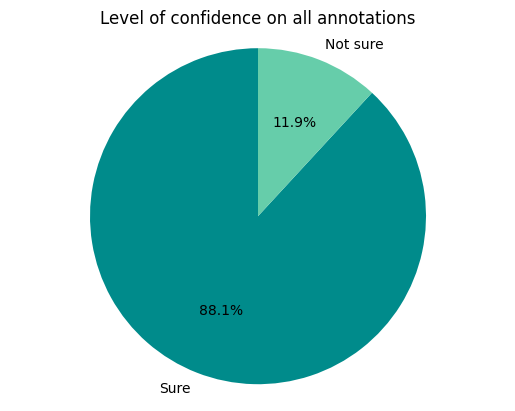

In [3]:
type_count = df["confidence"].value_counts()

plt.figure()
plt.pie(type_count, labels = type_count.index, autopct='%1.1f%%', startangle=90, colors = ['darkcyan', 'mediumaquamarine'])
plt.axis('equal')
plt.title("Level of confidence on all annotations")
plt.show()
# Je vais peut être juste utiliser les pourcentages dans un tableau, ça sera plus pertinent

In [6]:
# Count by label and confidence
counts = df.groupby(['label', 'confidence']).size().unstack(fill_value=0)

# Sort labels
counts['total'] = counts.sum(axis=1)
counts = counts.sort_values('total', ascending=True)

labels = counts.index.tolist()
n_labels = len(labels)
x = np.arange(n_labels)
width = 0.6

fig, ax = plt.subplots(figsize=(14,12))

# Sure bars
bars_sure = ax.bar(x, counts.get('Sure', 0), width, bottom=counts.get('Not sure', 0), label='Sure', color='darkcyan')
# Not sure bars
bars_not_sure = ax.bar(x, counts.get('Not sure', 0), width, label='Not sure', color='mediumaquamarine')

# Total occurrences on top (by label)
for i in range(n_labels):
    total = counts.get('Sure', 0).iloc[i] + counts.get('Not sure', 0).iloc[i]

    ax.annotate(str(total), xy=(x[i], total), xytext=(0,10), textcoords='offset points', ha='center', va='bottom', fontsize=9)

# Total label count
global_total = counts['total'].sum()
ax.text(0.01, 0.99, f"Total annotations : {global_total}", transform=ax.transAxes, fontsize=12, verticalalignment='top', ha='left', bbox=dict(facecolor='white', alpha=0.9))

# ax.text(x[i], total, str(total), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel('Number of detections')
# ax.set_ylim(top=(counts.sum(axis=1).max() * 1.2))
ax.set_ylim(0, 1700)
ax.legend(loc="upper left", bbox_to_anchor=(0.0, 0.97), frameon=True)
ax.set_title('Annotation histogram with confidence label')
plt.tight_layout()
plt.show()

In [7]:
# ### Seasonality histograms -> not normalised
# # Select target label
# for label in labels:
#     # Filter corresponding lines
#     df_label = df[df["label"] == label].copy()
#
#     # Convert dates and extract days
#     df_label['start_datetime'] = pd.to_datetime(df_label['start_datetime']).dt.tz_localize(None)
#
#     df_label['day'] = df_label['start_datetime'].dt.date # Extract the date without the hour
#     df_label['month'] = df_label['start_datetime'].dt.to_period('M')
#
#     # Delete day duplicates
#     df_unique_days = df_label[['day', 'month']].drop_duplicates()
#
#     # Count the number of days per month
#     count_by_month = df_unique_days.groupby('month').size().sort_index()
#
#     # Convert to datetime index
#     count_by_month.index = count_by_month.index.to_timestamp()
#
#     full_index = pd.date_range(start=date_start, end=date_end, freq='MS') # MS = Month Start
#     count_by_month = count_by_month.reindex(full_index, fill_value=0)
#
#     # Plot
#     fig, ax = plt.subplots(figsize=(12,6))
#     ax.bar(count_by_month.index, count_by_month.values, width=20, color='darkcyan')
#
#     # Major ticks every 3 months
#     ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#     ax.tick_params(axis='x', which='major', length=12, width=1.5)
#
#     # Minor locators for other months
#     ax.xaxis.set_minor_locator(mdates.MonthLocator())
#     ax.tick_params(axis='x', which='minor', length=5)
#
#     ax.set_title(f'Number of days where {labels_info[label]} was detected by month')
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Number of positive detection days')
#     ax.set_xlim(date_start, date_end)
#     ax.set_ylim(0,28)
#     plt.tight_layout()
#     plt.show()
#     # plt.savefig(os.path.join(output_path, f'seasonality_{label}.png')) # Mettre en pdf pour le rapport

/tmp/ipykernel_100272/2957704050.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(12,6))


In [8]:
# Histogramme nombre de spectrogrammes à annoter par mois sur les 4 années -> nous dit pourquoi on a normalisé, à mettre dans méthode
# 1. Extraire l'identifiant du spectrogramme depuis le file_name
df['spectro_id'] = df['filename'].str.extract(r'(\d{6})\.wav$')[0]

# 2. Nettoyer les dates
df['start_datetime'] = pd.to_datetime(df['start_datetime']).dt.tz_localize(None)
df['month'] = df['start_datetime'].dt.to_period('M')  # format AAAA-MM

# 3. Supprimer les doublons (un spectrogramme par mois)
df_unique = df.drop_duplicates(subset='spectro_id')

# 4. Compter le nombre de spectrogrammes uniques par mois
count_by_month = df_unique.groupby('month').size()

# 5. Reindex pour inclure les mois sans détection
count_by_month.index = count_by_month.index.to_timestamp()
full_index = pd.date_range(start=count_by_month.index.min(), end=count_by_month.index.max(), freq='MS')
count_by_month = count_by_month.reindex(full_index, fill_value=0)

# 6. Tracer l'histogramme
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(count_by_month.index, count_by_month.values, width=20, align='center', color='darkcyan')

# Mise en forme des dates sur l'axe x
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis='x', which='major', length=10, labelrotation=45)
ax.tick_params(axis='x', which='minor', length=4)

# Titres et axes
ax.set_title('Number of annotated spectrograms per month')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_xlim(full_index.min(), full_index.max())
plt.tight_layout()
plt.show()